Downloaded the annotation files from the imagenet website.

Then extracted the corresponding annotation files for the 3 categories(Mouse, Mango, Pencil).

In [ ]:
image_folder = "n07764155"
annot_folder = "Annotation/n07764155/Annotation/n07764155"

Upon changing the above path, stored the image files and their annotations in order.

In [8]:
images = os.listdir(image_folder)
for image in images:
    xml = os.path.splitext(image)[0]+ ".xml"
    if xml in os.listdir(annot_folder):
        shutil.copy(os.path.join(image_folder, image), os.path.join("Organised_Data/images", image))
        shutil.copy(os.path.join(annot_folder, xml), os.path.join("Organised_Data/annot_files", xml))

In [79]:
images = os.listdir("Organised_Data/images")
random_images = random.sample(images, 25)

In [80]:
random_images

['n03908204_9839.JPEG',
 'n02352591_5693.JPEG',
 'n03908204_15123.JPEG',
 'n03908204_1646.JPEG',
 'n07764155_2949.JPEG',
 'n07764155_1408.JPEG',
 'n03908204_17719.JPEG',
 'n03908204_17390.JPEG',
 'n03908204_7816.JPEG',
 'n07764155_5757.JPEG',
 'n02352591_4699.JPEG',
 'n07764155_803.JPEG',
 'n02352591_4801.JPEG',
 'n02352591_3001.JPEG',
 'n02352591_6381.JPEG',
 'n02352591_1357.JPEG',
 'n07764155_9247.JPEG',
 'n07764155_11577.JPEG',
 'n07764155_1686.JPEG',
 'n07764155_1339.JPEG',
 'n03908204_14923.JPEG',
 'n02352591_5395.JPEG',
 'n07764155_3404.JPEG',
 'n03908204_13861.JPEG',
 'n07764155_3789.JPEG']

In [81]:
def calculate_intersection_area(box1, box2):
    # Calculate the intersection area of two bounding boxes
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    return intersection_area

def calculate_union_area(box1, box2):
    # Calculate the union area of two bounding boxes
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - calculate_intersection_area(box1, box2)
    return union_area

def calculate_overlap_percentage(box1, box2, name1, name2):
    # Calculate the percentage overlap of two bounding boxes
    intersection_area = calculate_intersection_area(box1, box2)
    union_area = calculate_union_area(box1, box2)
    overlap_percentage = intersection_area / union_area
    print(f"Overlap between {name1} and {name2}: {overlap_percentage:.2%}")

The bounding box information is extracted from the annotation file for the corresponding image a

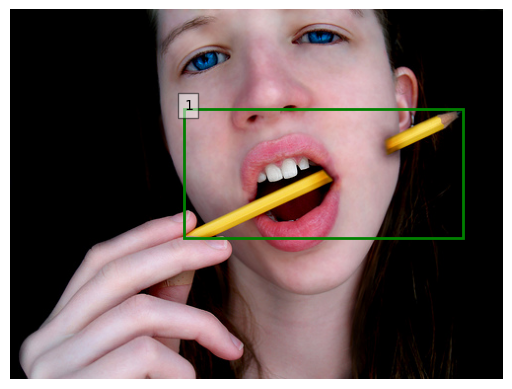

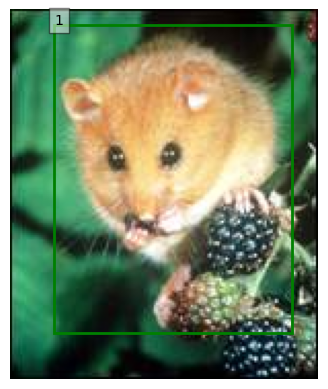

Overlap between 1 and 2: 1.42%


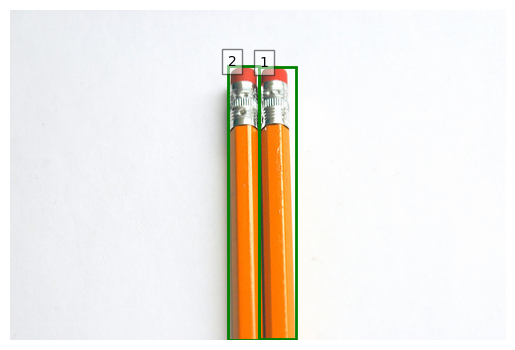

Overlap between 1 and 2: 44.14%


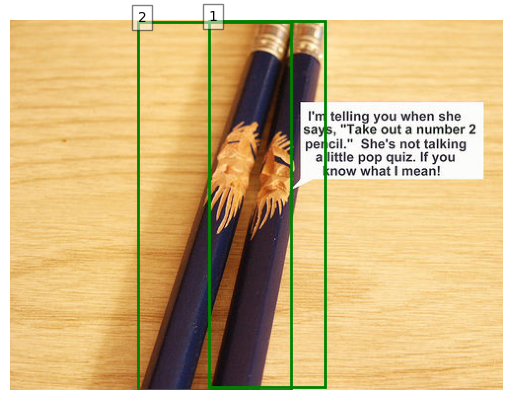

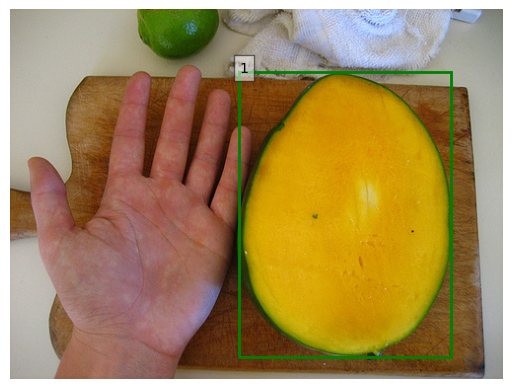

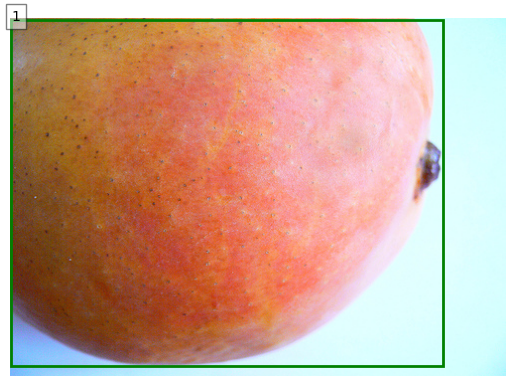

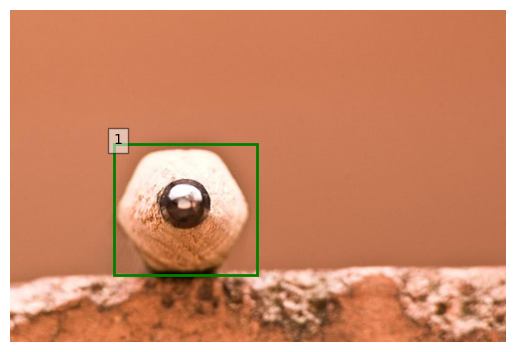

Overlap between 1 and 2: 0.00%
Overlap between 1 and 3: 36.15%
Overlap between 2 and 3: 31.13%


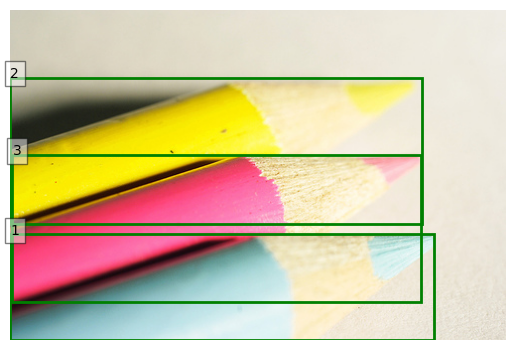

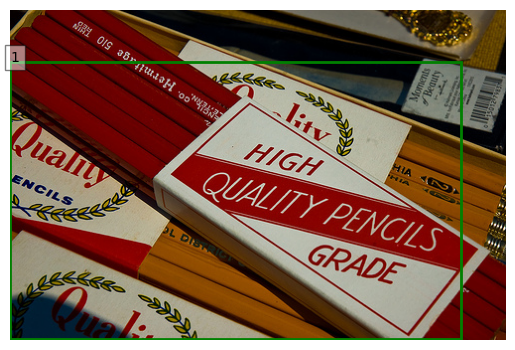

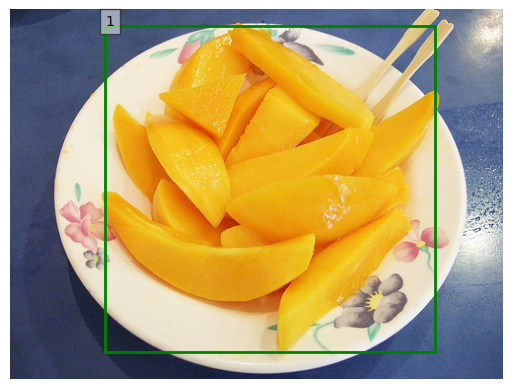

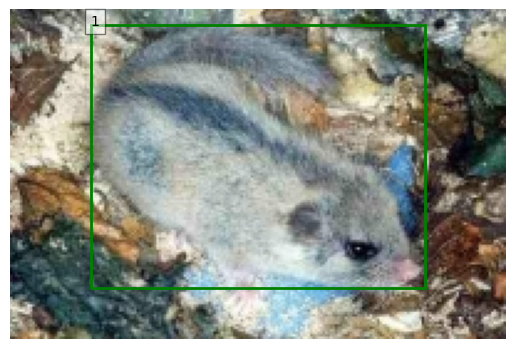

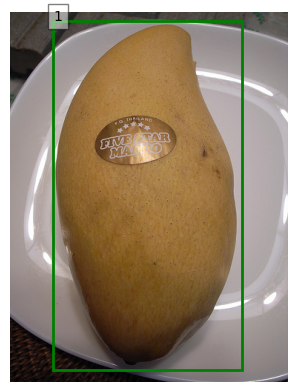

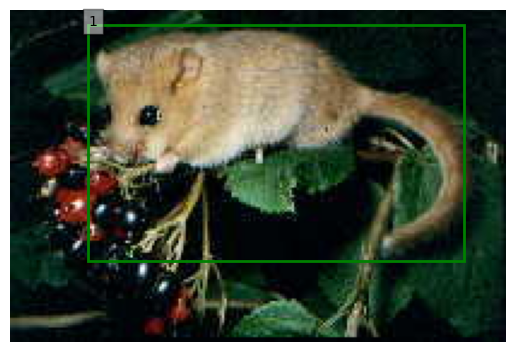

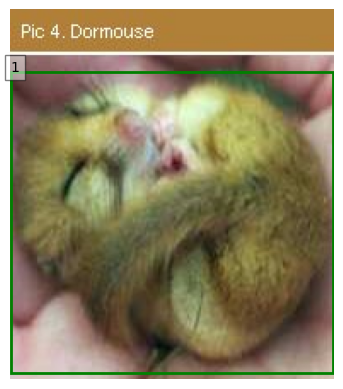

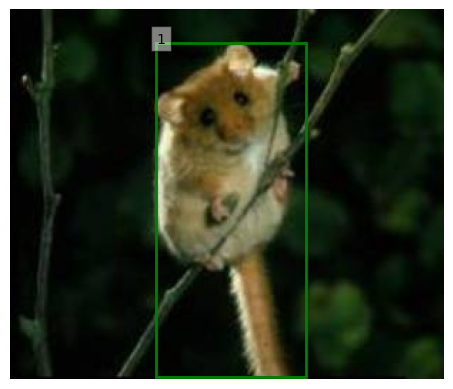

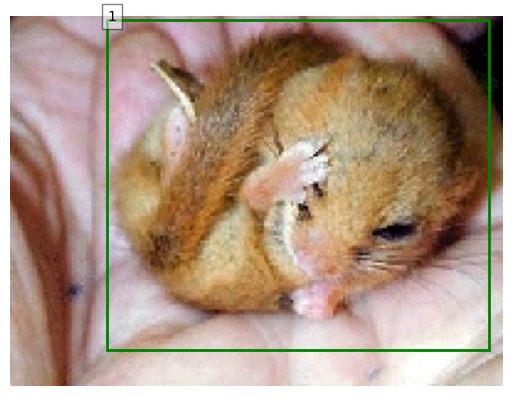

Overlap between 1 and 2: 7.64%


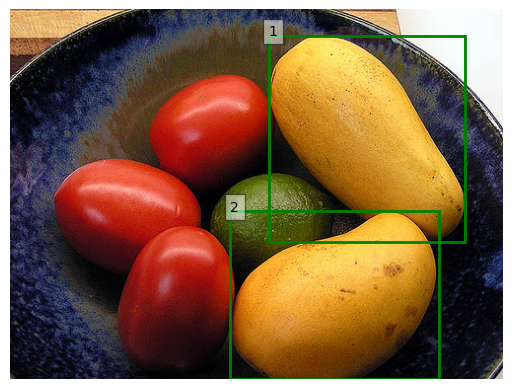

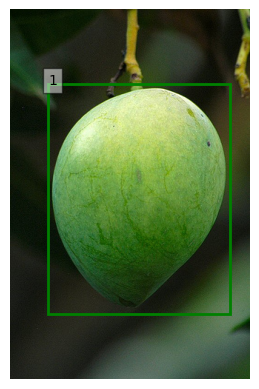

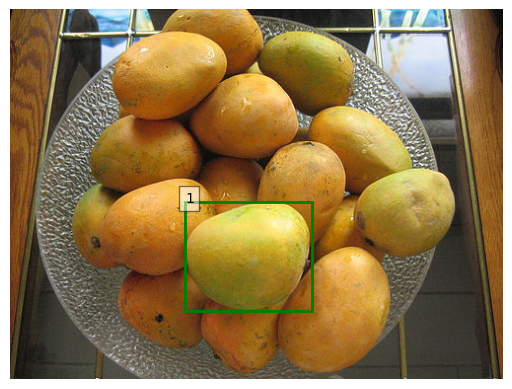

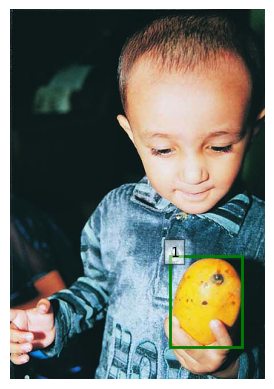

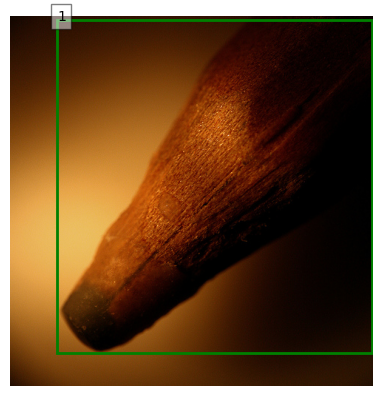

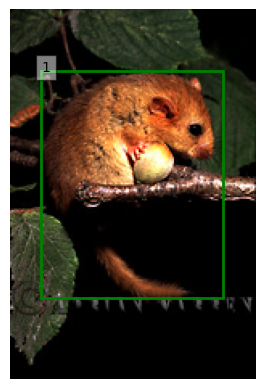

Overlap between 1 and 2: 0.00%


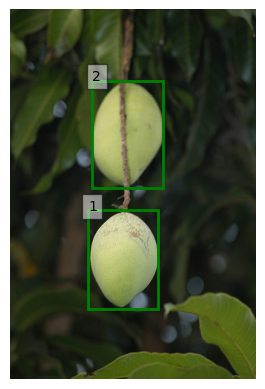

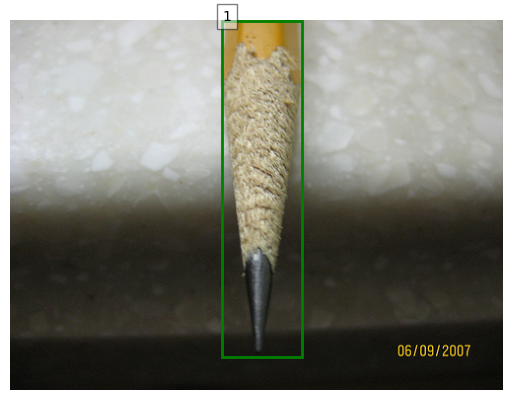

Overlap between 1 and 2: 3.64%
Overlap between 1 and 3: 0.00%
Overlap between 1 and 4: 8.64%
Overlap between 2 and 3: 0.74%
Overlap between 2 and 4: 10.82%
Overlap between 3 and 4: 0.00%


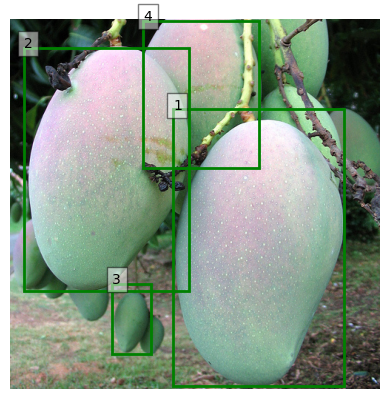

In [82]:
from PIL import Image
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for image_file in random_images:
    image_path = os.path.join(organized_data_folder, "images", image_file)
    image = Image.open(image_path)

    xml_file = os.path.splitext(image_file)[0] + ".xml"
    xml_path = os.path.join(organized_data_folder, "annot_files", xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    fig, ax = plt.subplots(1)

    ax.imshow(image)

    box_count = 0
    boxes = []
    box_names = []
    for obj in root.findall('object'):
        box_count += 1
        xmin = int(obj.find('bndbox').find('xmin').text)
        ymin = int(obj.find('bndbox').find('ymin').text)
        xmax = int(obj.find('bndbox').find('xmax').text)
        ymax = int(obj.find('bndbox').find('ymax').text)
        
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
        ax.add_patch(rect)
        ax.text(xmin, ymin, str(box_count), bbox=dict(facecolor='white', alpha=0.5))
        
        boxes.append([xmin, ymin, xmax, ymax])
        box_names.append(str(box_count))

    if len(boxes) > 1:
        for i in range(len(boxes)):
            for j in range(i + 1, len(boxes)):
                calculate_overlap_percentage(boxes[i], boxes[j], box_names[i], box_names[j])


    ax.axis('off')
    plt.show()
